# Lab 05

## Solving a rigid system of differential equations

### Konks Eric, Б01-818

X.9.7

$$y_1'=-0.04y_1+10^4y_2y_3$$

$$y_2'=0.04y_1-10^4y_2y_3-3*10^7y_2^2$$

$$y_3'=3*10^7y_2^2$$

$$y_1(0)=1,\ y_2(0)=0,\ y_3(0)=0$$

In [1]:
import unittest
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#logging.basicConfig(level=logging.DEBUG)

In [3]:
class RODE:
    def __init__(self):
        self.log = logging.getLogger("RODE")
    
    def k_calc_stop(self, k_cur, k_next, delta):
        if id(k_cur) == id(k_next):
            return False
        
        if np.abs(np.linalg.norm(np.matrix(k_cur)) - np.linalg.norm(np.matrix(k_next))) < delta:
            return True
        
        return False
    
    def k_calc(self, stages, c_vec, b_vec, a, f_vec, u_res, h, t_res, delta):
        k_next = [[0 for _ in range(stages)] for _ in range(len(f_vec))]
        k_cur = k_next
        
        itr = 0
        while not self.k_calc_stop(k_cur, k_next, delta):
            k_tmp = k_next
            k_next = [k_cur[i][:] for i in range(len(k_cur))]
            k_cur = k_tmp
            for s in range(stages):
                u_k = [u_res[-1][j]+h*sum(a[s][m]*k_cur[j][m] for m in range(s)) for j in range(len(f_vec))]
                self.log.debug(f"Iter[{itr}]|S[{s}]: u_k: {u_k}")
                for i in range(len(f_vec)):
                    k_next[i][s] = f_vec[i](t_res[-1]+c_vec[s]*h, u_k)

            self.log.debug(f"Iter[{itr}]]: k: {k_next}")
            
            itr = itr + 1

        return k_next
    
    def solve(self, stages, c_vec, b_vec, a, f_vec, u_init, h, t_range, delta):
        u_res = [u_init,]
        t_res = [t_range[0],]
        while t_res[-1] < t_range[1]:
            u_cur = [0 for _ in range(len(f_vec))]
            k = self.k_calc(stages, c_vec, b_vec, a, f_vec, u_res, h, t_res, delta)
            for i in range(len(f_vec)):
                u_cur[i] = u_res[-1][i]+h*sum(b_vec[s]*k[i][s] for s in range(stages))
            
            self.log.debug(f"T[{t_res[-1]}]: k: {k}")
            self.log.debug(f"T[{t_res[-1]}]: u: {u_cur}")
            u_res.append(u_cur)
            t_res.append(t_res[-1]+h)
            
        return (t_res, u_res)

In [4]:
log = logging.getLogger()
c_vec = [1/2-np.sqrt(15)/10, 1/2, 1/2+np.sqrt(15)/10]
b_vec = [5/18, 4/9, 5/18]
a = [[5/36,2/9-np.sqrt(15)/15,5/36-np.sqrt(15)/30],
     [5/36+np.sqrt(15)/24,2/9,5/36-np.sqrt(15)/24],
     [5/36+np.sqrt(15)/30,2/9+np.sqrt(15)/15,5/36]]
#c_vec = [1/3, 1]
#b_vec = [3/4, 1/4]
#a = [[5/12, -1/12], [3/4, 1/4]]
log.debug(f"c={c_vec}")
log.debug(f"b={b_vec}")
log.debug(f"a={a}")
u_init = [1, 0, 0]
t_range = (0, 40)
delta = 10e-6
h = 0.001
f1 = lambda t, u_vec: -0.04*u_vec[0]+10**4*u_vec[1]*u_vec[2]
f2 = lambda t, u_vec: 0.04*u_vec[0]-10**4*u_vec[1]*u_vec[2]-3*10**7*u_vec[1]**2
f3 = lambda t, u_vec: 3*10**7*u_vec[1]**2
f_vec = [f1, f2, f3]
rode = RODE()
res = rode.solve(len(c_vec), c_vec, b_vec, a, f_vec, u_init, h, t_range, delta)
df = pd.DataFrame({"t": res[0], "(y1, y2, y3)": res[1]})
print(df)

            t                                       (y1, y2, y3)
0       0.000                                          [1, 0, 0]
1       0.001  [0.9999600007070238, 3.160911290458521e-05, 8....
2       0.002  [0.9999200096569564, 3.635339873378606e-05, 4....
3       0.003  [0.9998800342501171, 3.649800066650599e-05, 8....
4       0.004  [0.999840075037782, 3.649288365169819e-05, 0.0...
...       ...                                                ...
39997  39.997  [0.7158335537211122, 9.185178117035123e-06, 0....
39998  39.998  [0.7158310227510469, 9.184753283527227e-06, 0....
39999  39.999  [0.715828491981854, 9.184153341901414e-06, 0.2...
40000  40.000  [0.715825961492197, 9.183284351392223e-06, 0.2...
40001  40.001  [0.7158234314029306, 9.182001972429047e-06, 0....

[40002 rows x 2 columns]


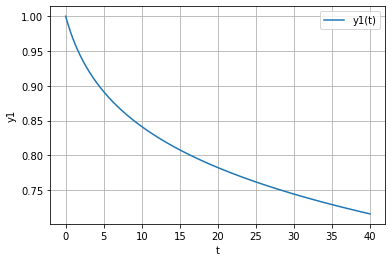

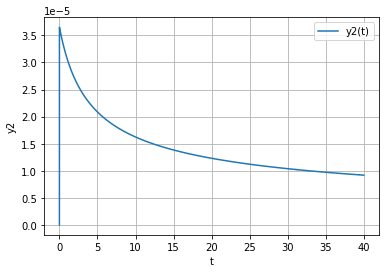

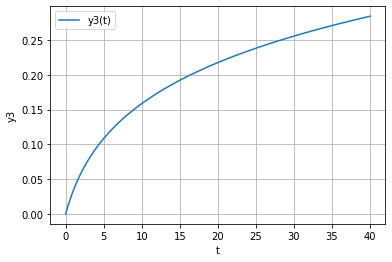

In [5]:
def mplot(x, y, xlabel, ylabel):
    plt.plot(x, y, label=f"{ylabel}({xlabel})")
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

mplot(res[0], [j[0] for j in res[1]], 't', 'y1')
mplot(res[0], [j[1] for j in res[1]], 't', 'y2')
mplot(res[0], [j[2] for j in res[1]], 't', 'y3')